In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

In [49]:
df=pd.read_csv(r"C:\Users\Home\Downloads\insurance.csv")

In [50]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [51]:
df.shape

(1338, 7)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# EDA

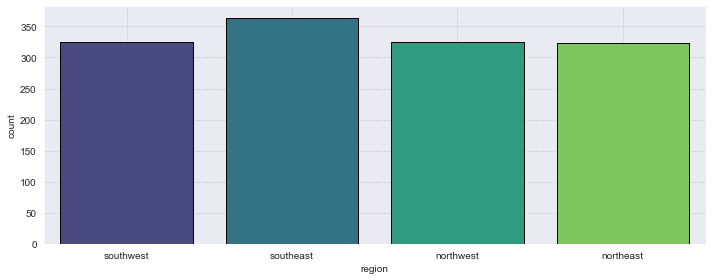

In [53]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.countplot(x=df['region'],palette='viridis',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

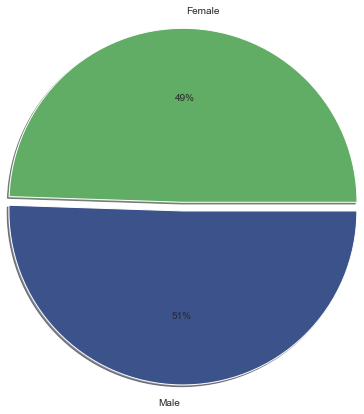

In [54]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
#to see the composition of Gender
out_df=pd.DataFrame(df.groupby('sex')['sex'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['sex'],labels=['Female','Male'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

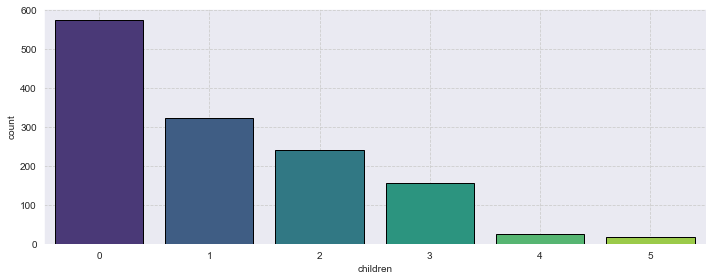

In [55]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.countplot(x=df['children'],palette='viridis',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

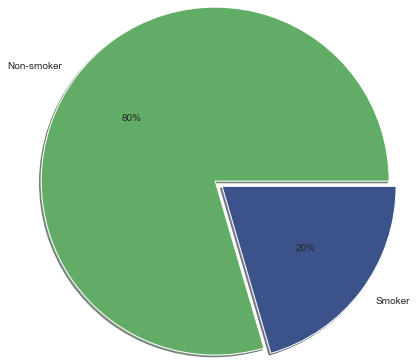

In [56]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
#to see the composition of smoker
out_df=pd.DataFrame(df.groupby('smoker')['smoker'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['smoker'],labels=['Non-smoker','Smoker'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

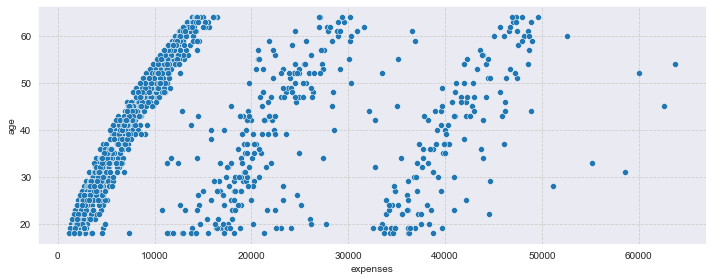

In [57]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(y=df['age'],x=df['expenses'],palette='RdYlGn_r')
plt.tight_layout()
plt.grid(True)
plt.show()

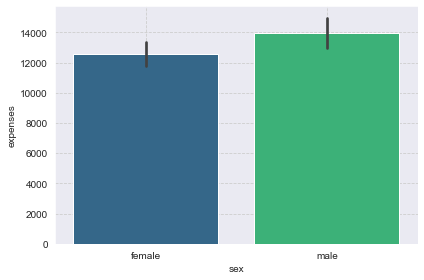

In [58]:
sns.barplot(x='sex',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

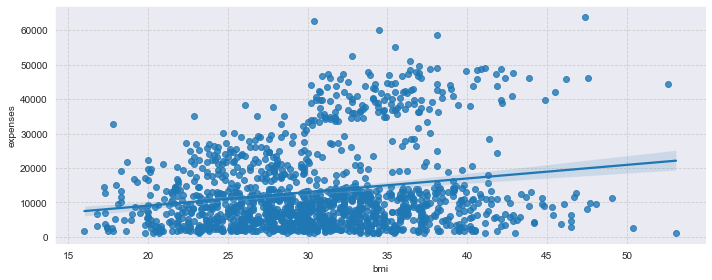

In [59]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.regplot(x=df['bmi'],y=df['expenses'])
plt.tight_layout()
plt.grid(True)
plt.show()

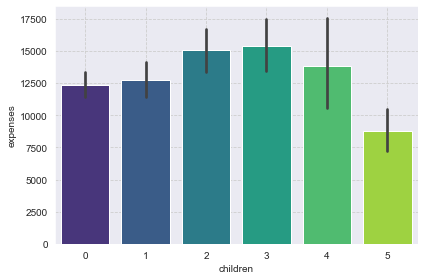

In [60]:
sns.barplot(x='children',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

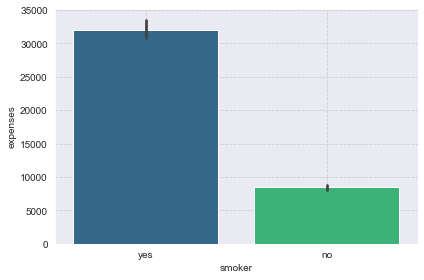

In [61]:
sns.barplot(x='smoker',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

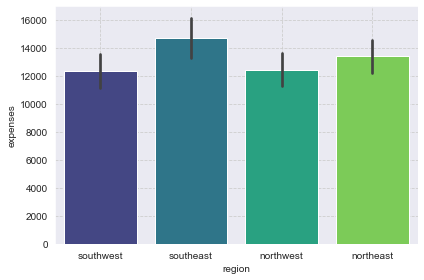

In [62]:
sns.barplot(x='region',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

# Data preprocessing

In [63]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [64]:
def cat2col(data,col):
    dummy=pd.get_dummies(data[col],drop_first=True)
    data.drop(col, axis=1,inplace=True)
    data= pd.concat([data,dummy],axis =1)
    return data

In [65]:
for i in df.columns:
    if df[i].dtype ==object:
        print(i)
        df =cat2col(df,i)

sex
smoker
region


In [66]:
df.head()

,age,bmi,children,expenses,male,yes,northwest,southeast,southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [67]:
X=df.drop('expenses',axis=1)
y=df.expenses

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

# Model Fitting

In [69]:
scores=[]
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

# Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression

model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
pred_lr=model_lr.predict(X_test)

In [71]:
pred=pred_lr

print('Testing R2 Score: ', r2_score(y_test, pred_lr)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_lr))


Testing R2 Score:  70.99717048857268 
Testing mean squared:  41767384.48798242


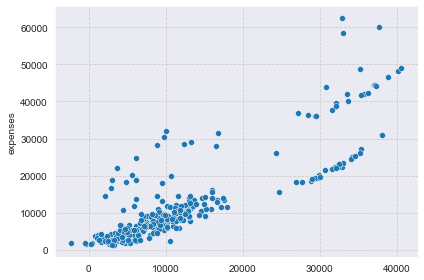

In [72]:
plt.figure(figsize=(6,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.grid(True)
plt.show()

In [73]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_search = GridSearchCV(estimator = model_lr,  
                           param_grid = parameters,cv=None)


grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_

In [74]:
best_grid

LinearRegression(normalize=True)

In [75]:
pred_lr= best_grid.predict(X_test)
r2_score(y_test, pred_lr)*100

70.99717048857268

In [76]:
scores.append({
        'model': 'Linear Regression',
        'r2_score': r2_score(y_test, pred_lr)*100,
    'MS_score' : mean_squared_error(y_test,pred_lr)
    })

# Decision tree regressor

In [77]:
from sklearn.tree import DecisionTreeRegressor

model_dt= DecisionTreeRegressor(random_state=12)
model_dt.fit(X_train,y_train)
pred_dt=model_dt.predict(X_test)

In [78]:
pred=pred_dt

print('Testing R2 Score: ', r2_score(y_test, pred_dt)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_dt))

Testing R2 Score:  68.17717562586392 
Testing mean squared:  45828498.92643694


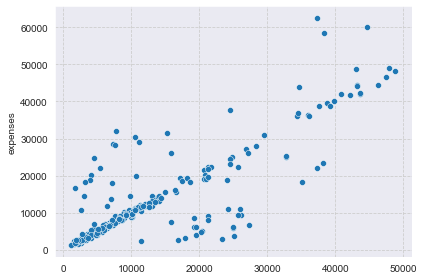

In [79]:
plt.figure(figsize=(6,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
model_dt= DecisionTreeRegressor()
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model_dt, param_grid = parameters,scoring='neg_mean_absolute_error', 
                          cv = 3,verbose = 3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

best_grid = grid_search.best_estimator_

In [81]:
best_grid

DecisionTreeRegressor(max_depth=9, max_features='auto', max_leaf_nodes=70,
                      min_samples_leaf=3, min_weight_fraction_leaf=0.1)

In [82]:
pred_dt= best_grid.predict(X_test)
r2_score(y_test, pred_dt)*100

80.01646176111002

In [93]:
scores.append({
        'model': 'Decision Tree',
        'r2_score': r2_score(y_test, pred_dt)*100,
    'MS_score' : mean_squared_error(y_test,pred_dt)
    })

# Random Forest Regressor

In [94]:
from sklearn.ensemble import  RandomForestRegressor

model_rf= RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)
pred_rf= model_rf.predict(X_test)

In [95]:
pred=pred_rf

print('Testing R2 Score: ', r2_score(y_test, pred_rf)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_rf))

Testing R2 Score:  82.00427631427718 
Testing mean squared:  25915895.896465134


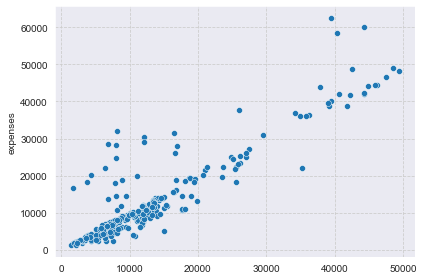

In [96]:
plt.figure(figsize=(6,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.grid(True)
plt.show()

In [97]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='neg_mean_absolute_error', 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [98]:
best_grid

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=300)

In [99]:
pred_rf= best_grid.predict(X_test)
r2_score(y_test, pred_rf)*100

82.18394057281448

In [ ]:
mean_squared_error(y_test,pred_rf)

In [100]:
scores.append({
        'model': 'Random Forest',
        'r2_score': r2_score(y_test, pred_rf)*100,
    'MS_score' : mean_squared_error(y_test,pred_rf)
    })



# Model Evaluation

In [117]:
Score = pd.DataFrame(scores,columns=['model','r2_score','MS_score'])
Score.sort_values('r2_score',ascending=False,inplace=True)
Score = Score.set_index('model')

In [124]:
Score

,r2_score,MS_score
model,,
Random Forest,82.183941,2.565716e+07
Decision Tree,80.016462,2.877858e+07
Linear Regression,70.997170,4.176738e+07


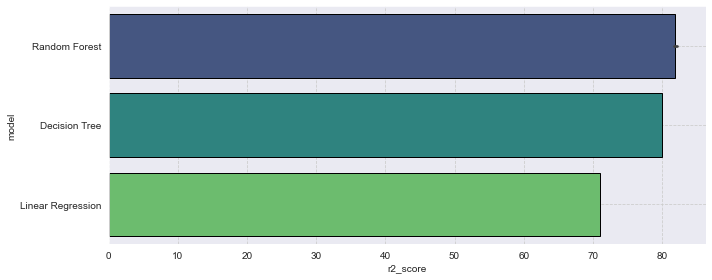

In [102]:
plt.figure(figsize=(10,4))
sns.barplot(y=Score['model'],x=Score['r2_score'],palette='viridis',edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()